In [ ]:
import keras
import cv2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)s

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


In [ ]:
x_train = x_train.reshape(60000,28,28)
x_test = x_test.reshape(x_test.shape[0],28,28)

In [ ]:
input_shape=(28,28,1)

In [ ]:
y_train = keras.utils.to_categorical(y_train,10)
print(y_train.shape)

(60000, 10)


In [ ]:
y_test = keras.utils.to_categorical(y_test,10)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

<ipython-input-14-2a1f7e8a1497>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,i+1)


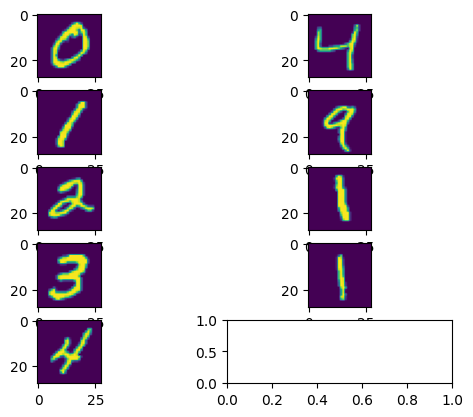

In [ ]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.subplot(5,2,i+1)

In [ ]:
#from keras.optimizers import Adam
#optimizer = Adam(learning_rate=0.001)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 5, 5, 32)          0         
                                                                 
 flatten_6 (Flatten)         (None, 800)              

In [ ]:
from keras.utils import plot_model
from keras.optimizers import Adadelta, Adagrad, Adam, RMSprop, SGD
batch_size = 128
epochs = 10
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
for optimizer_name in optimizers:
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    # Compile the model with the current optimizer
    if optimizer_name == 'Adadelta':
        optimizer = Adadelta()
    elif optimizer_name == 'Adagrad':
        optimizer = Adagrad()
    elif optimizer_name == 'Adam':
        optimizer = Adam()
    elif optimizer_name == 'RMSprop':
        optimizer = RMSprop()
    elif optimizer_name == 'SGD':
        optimizer = SGD()

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Visualize and save the model
    plot_model(model, to_file=f"{optimizer_name}_mnist_model.jpg", show_shapes=True)

    # Train the model
    hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 24s 49ms/step - loss: 66.6308 - accuracy: 0.0944 - val_loss: 21.1252 - val_accuracy: 0.0960
Epoch 2/10
469/469 [==============================] - 25s 54ms/step - loss: 52.9381 - accuracy: 0.1161 - val_loss: 14.1818 - val_accuracy: 0.1787
Epoch 3/10
469/469 [==============================] - 32s 68ms/step - loss: 43.6745 - accuracy: 0.1379 - val_loss: 10.1683 - val_accuracy: 0.2872
Epoch 4/10
469/469 [==============================] - 31s 67ms/step - loss: 35.9457 - accuracy: 0.1623 - val_loss: 7.5930 - val_accuracy: 0.3956
Epoch 5/10
469/469 [==============================] - 22s 48ms/step - loss: 29.8841 - accuracy: 0.1897 - val_loss: 5.7701 - val_accuracy: 0.4716
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 24.8090 - accuracy: 0.2201 - val_loss: 4.4938 - val_accuracy: 0.5330
Epoch 7/10
469/469 [==============================] - 23s 50ms/step - loss: 20.8205 - accuracy: 0.2457 - val_loss: 3.5246 - val

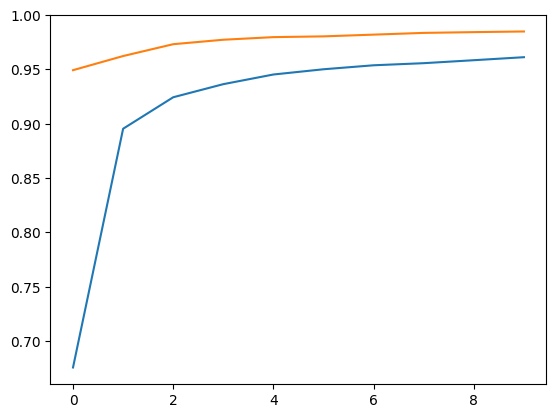

In [ ]:
y1 = hist.history['accuracy']
y2 = hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

In [ ]:
model.save("mnist.h5")
from tensorflow.keras.models import load_model
import numpy as np

1/1 [==============================] - 0s 25ms/step
1


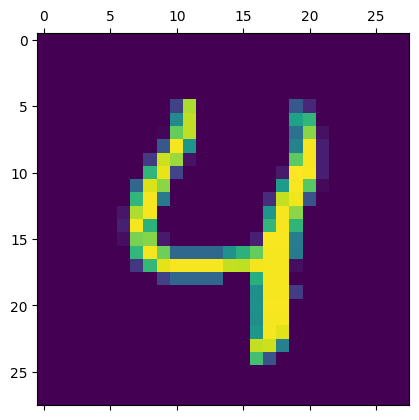

In [ ]:
import numpy as np
img = x_test[4]
#.reshape(len(x_test[0]),28)
#img = cv2.resize(img,(28,28))
img = np.reshape(img,(1,28,28))
img = img.astype('float32')
img = img/255
pred = model.predict(img)
answer = np.argmax(pred)
print(answer)
plt.matshow(x_test[4])